# Quantum Optics Assignment 2 #
Taha Yusuf Raja - 2020B5AA0910P

In [23]:
import numpy as np
import matplotlib.pyplot as plt

In [24]:
state = (1/(2**0.5))*np.array([[1,0], [0, 1]])

In [25]:
def multiply(c1, c2):
    real = c1[0]*c2[0] - c1[1]*c2[1]
    imag = c1[1]*c2[0] + c1[0]*c2[1]
    return [real, imag]

def conjugate(c):
    return [c(0), -1*c[1]]

In [26]:
## Initial density matrix ##
density = np.array([[multiply(state[0], state[0]), multiply(state[0], -1*state[1])],
                    [multiply(state[1], state[0]), multiply(state[1], -1*state[1])]])

In [27]:
## Initial Values ##

u = 2*density[0,1][0]
v = 2*density[0,1][1]
w = density[1,1][0] - density[0,0][0]

print(u,v,w)

0.0 -0.9999999999999998 0.0


In [28]:
def fx(u, v, w):
    return (-gamma*u/2 - delta*v)

def fy(u,v,w):
    return (-gamma*v/2 + delta*u - omega*w)

def fz(u,v,w):
    return (-gamma*(w+1)+omega*v)

In [29]:
## Implementation of Runge-Kutta Method ##

timestep = 0.001

def RK(x, y, z, t):
    x_points = [x]
    y_points = [y]
    z_points = [z]
    t_points = [t]
    while t < 1:  

        kx1 = timestep*fx(x, y, z)
        ky1 = timestep*fy(x, y, z)
        kz1 = timestep*fz(x, y, z)

        kx2 = timestep*fx(x+kx1*0.5, y+ky1*0.5, z+kz1*0.5)
        ky2 = timestep*fy(x+kx1*0.5, y+ky1*0.5, z+kz1*0.5)
        kz2 = timestep*fz(x+kx1*0.5, y+ky1*0.5, z+kz1*0.5)

        kx3 = timestep*fx(x+kx2*0.5, y+ky2*0.5, z+kz2*0.5)
        ky3 = timestep*fy(x+kx2*0.5, y+ky2*0.5, z+kz2*0.5)
        kz3 = timestep*fz(x+kx2*0.5, y+ky2*0.5, z+kz2*0.5)

        kx4 = timestep*fx(x+kx3, y+ky3, z+kz3)
        ky4 = timestep*fy(x+kx3, y+ky3, z+kz3)
        kz4 = timestep*fz(x+kx3, y+ky3, z+kz3)

        x = x + (kx1 + 2*kx2 + 2*kx3 + kx4)/6
        y = y + (ky1 + 2*ky2 + 2*ky3 + ky4)/6
        z = z + (kz1 + 2*kz2 + 2*kz3 + kz4)/6

        # x = x + timestep*kx1
        # y = y + timestep*ky1
        # z = z + timestep*kz1
        
        t += timestep

        x_points.append(x)
        y_points.append(y)
        z_points.append(z)
        t_points.append(t)
        
                
    return(x_points, y_points, z_points, t_points)

In [30]:
def plot_points(x_points, y_points, z_points):
    fig = plt.figure(figsize=(12,12))
    ax = plt.axes(projection='3d')
    ax = fig.add_subplot(projection='3d')
    ax.set(xlabel='u', ylabel='v', zlabel='w')

    # Make data for Bloch Sphere
    r = np.linspace(0, 2 * np.pi, 100)
    s = np.linspace(0, np.pi, 100)
    x = np.outer(np.cos(r), np.sin(s))
    y = np.outer(np.sin(r), np.sin(s))
    z = np.outer(np.ones(np.size(r)), np.cos(s))

    # Plot the surface
    ax.plot_wireframe(x, y, z, linewidth=0.5)
    
    ax.plot3D(x_points, y_points, z_points, 'red')

In [31]:
gamma = 0  ## Damping Factor
delta = 0 ## Detuning Factor
omega = 10 ## Rabi Frequency

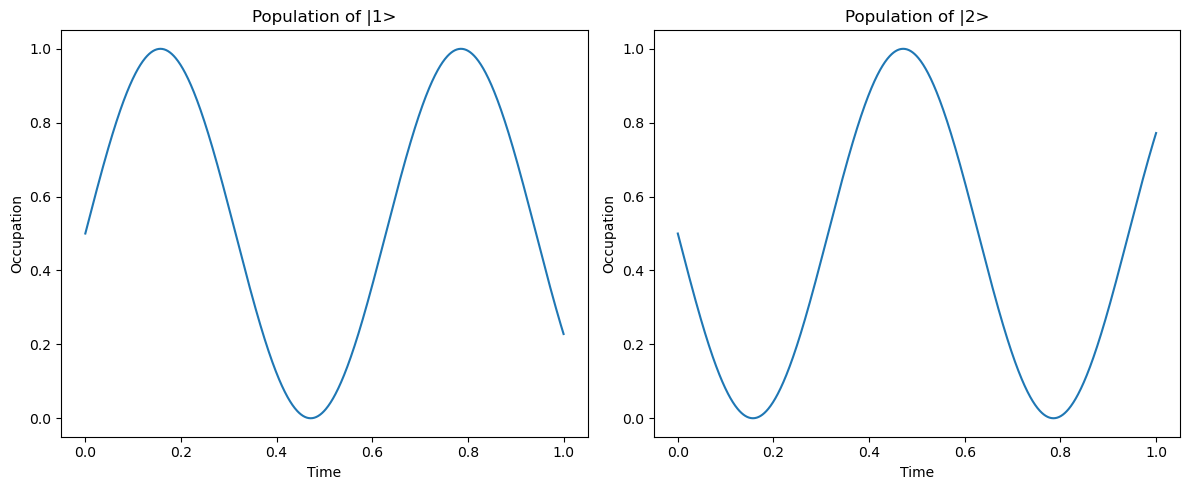

In [32]:
(u_points, v_points, w_points, t_points) = RK(u, v, w, 0)

# Calculate P11 and P22
P11 = 0.5*(np.ones(len(w_points))-w_points)
P22 = 0.5*(np.ones(len(w_points))+w_points)

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot Population of |1>
axes[0].plot(t_points, P11)
axes[0].set_title('Population of |1>')
axes[0].set_xlabel('Time')
axes[0].set_ylabel('Occupation')

# Plot Population of |2>
axes[1].plot(t_points, P22)
axes[1].set_title('Population of |2>')
axes[1].set_xlabel('Time')
axes[1].set_ylabel('Occupation')

# Show the plot
plt.tight_layout()
plt.show()

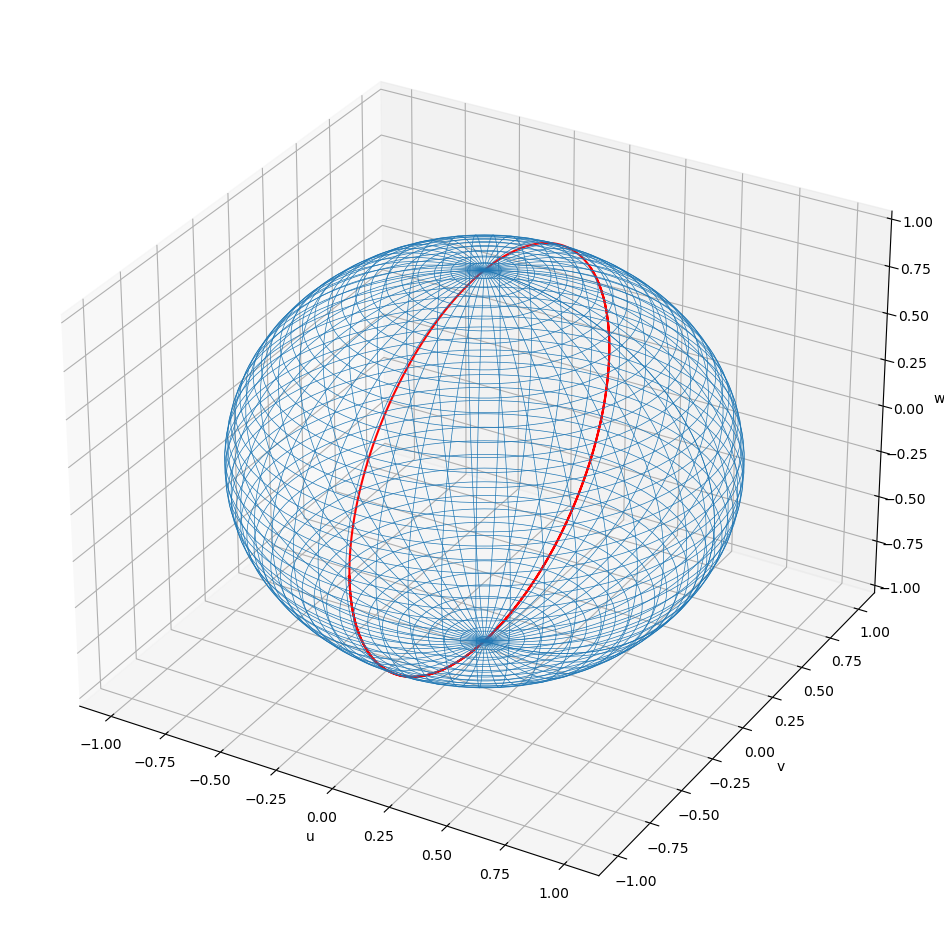

In [33]:
plot_points(u_points, v_points, w_points)

## Introducing the Damping Factor ##

In [34]:
gamma = 10  ## Damping Factor
delta = 0 ## Detuning Factor
omega = 30 ## Rabi Frequency

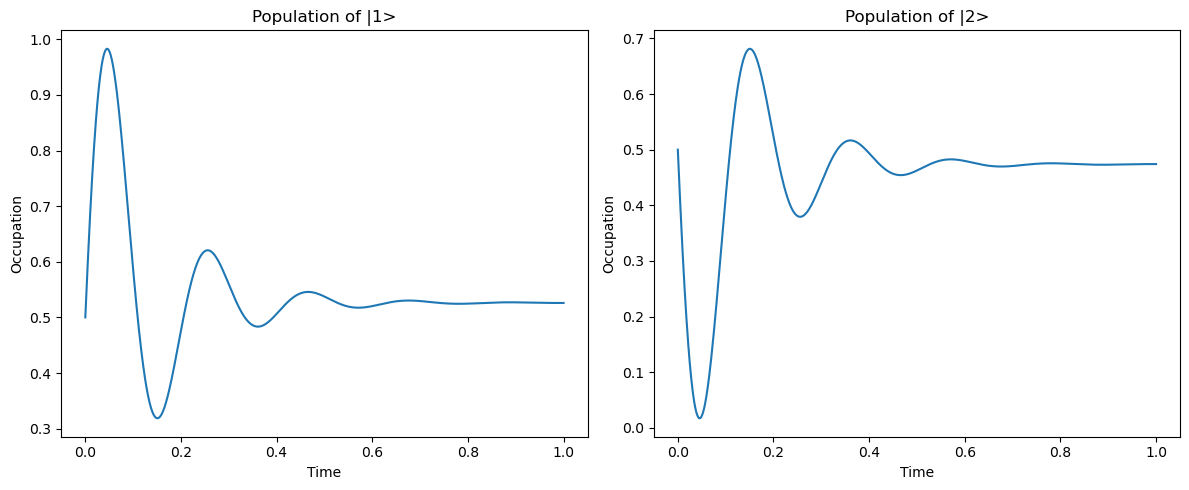

In [35]:
(u_points, v_points, w_points, t_points) = RK(u, v, w, 0)

# Calculate P11 and P22
P11 = 0.5*(np.ones(len(w_points))-w_points)
P22 = 0.5*(np.ones(len(w_points))+w_points)

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot Population of |1>
axes[0].plot(t_points, P11)
axes[0].set_title('Population of |1>')
axes[0].set_xlabel('Time')
axes[0].set_ylabel('Occupation')

# Plot Population of |2>
axes[1].plot(t_points, P22)
axes[1].set_title('Population of |2>')
axes[1].set_xlabel('Time')
axes[1].set_ylabel('Occupation')

# Show the plot
plt.tight_layout()
plt.show()

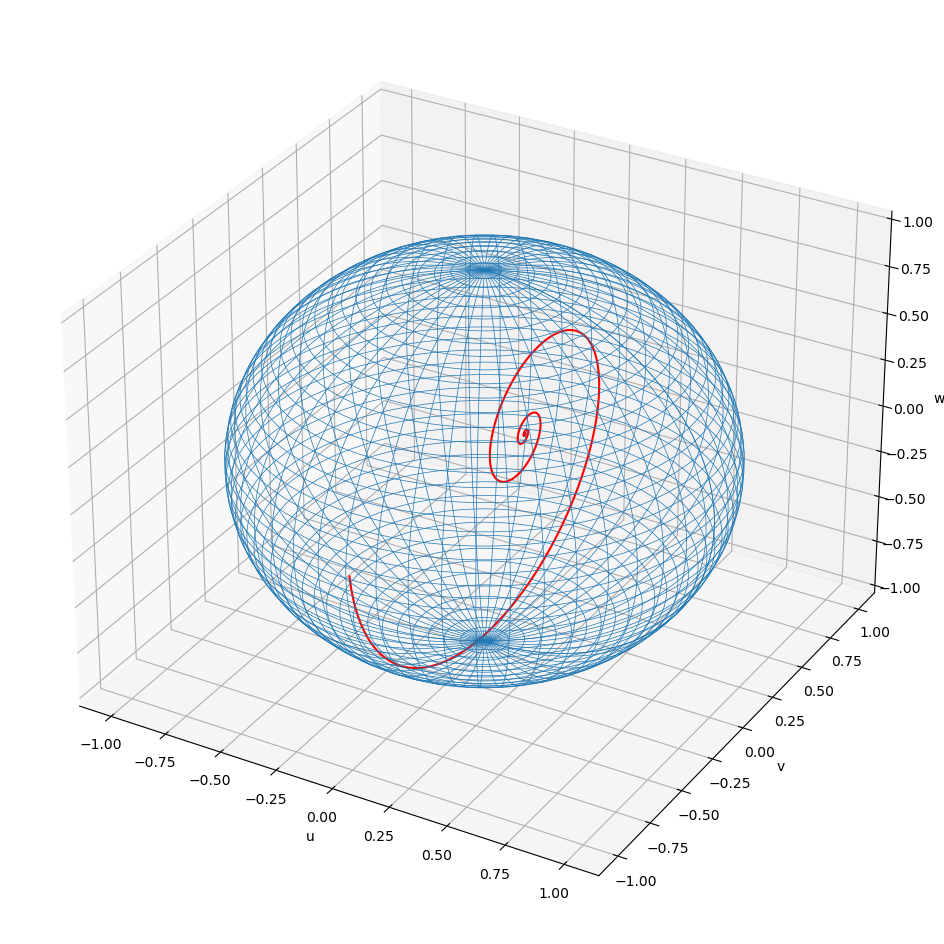

In [36]:
plot_points(u_points, v_points, w_points)

## Varying the Damping Factor ##

In [37]:
## Doubling the Damping Factor ##

gamma = 20  ## Damping Factor
delta = 0 ## Detuning Factor
omega = 30 ## Rabi Frequency

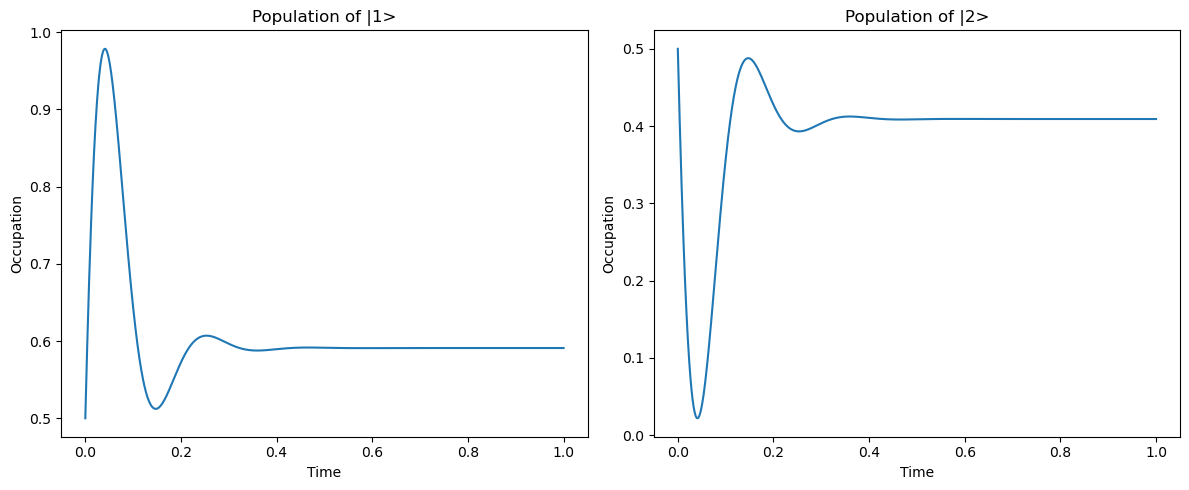

In [38]:
(u_points, v_points, w_points, t_points) = RK(u, v, w, 0)

# Calculate P11 and P22
P11 = 0.5*(np.ones(len(w_points))-w_points)
P22 = 0.5*(np.ones(len(w_points))+w_points)

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot Population of |1>
axes[0].plot(t_points, P11)
axes[0].set_title('Population of |1>')
axes[0].set_xlabel('Time')
axes[0].set_ylabel('Occupation')

# Plot Population of |2>
axes[1].plot(t_points, P22)
axes[1].set_title('Population of |2>')
axes[1].set_xlabel('Time')
axes[1].set_ylabel('Occupation')

# Show the plot
plt.tight_layout()
plt.show()

In [39]:
## Halving the Damping Factor ##

gamma = 5  ## Damping Factor
delta = 0 ## Detuning Factor
omega = 30 ## Rabi Frequency

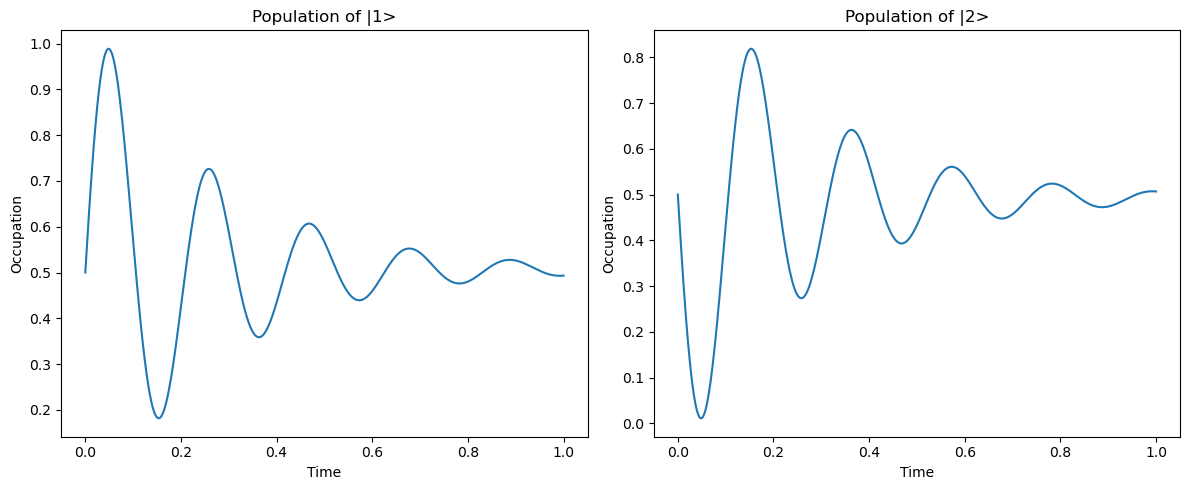

In [40]:
(u_points, v_points, w_points, t_points) = RK(u, v, w, 0)

# Calculate P11 and P22
P11 = 0.5*(np.ones(len(w_points))-w_points)
P22 = 0.5*(np.ones(len(w_points))+w_points)

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot Population of |1>
axes[0].plot(t_points, P11)
axes[0].set_title('Population of |1>')
axes[0].set_xlabel('Time')
axes[0].set_ylabel('Occupation')

# Plot Population of |2>
axes[1].plot(t_points, P22)
axes[1].set_title('Population of |2>')
axes[1].set_xlabel('Time')
axes[1].set_ylabel('Occupation')

# Show the plot
plt.tight_layout()
plt.show()

## Introducing the De-tuning Parameter ##

In [41]:
gamma = 10  ## Damping Factor
delta = 100 ## Detuning Factor
omega = 30 ## Rabi Frequency

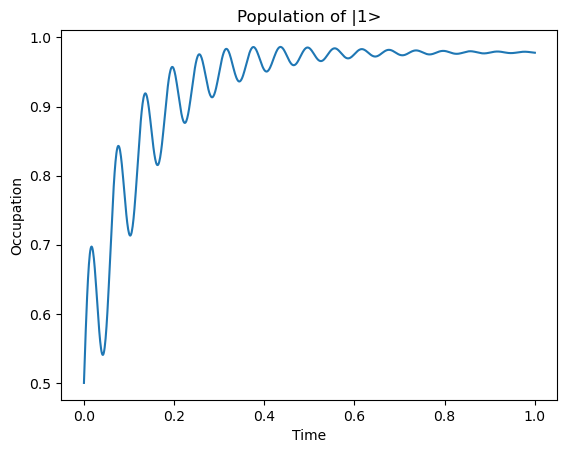

In [42]:
(u_points, v_points, w_points, t_points) = RK(u, v, w, 0)

P11 = 0.5*(np.ones(len(w_points))-w_points)
plt.plot(t_points, P11)
plt.title('Population of |1>')
plt.xlabel('Time')
plt.ylabel('Occupation')
plt.show()

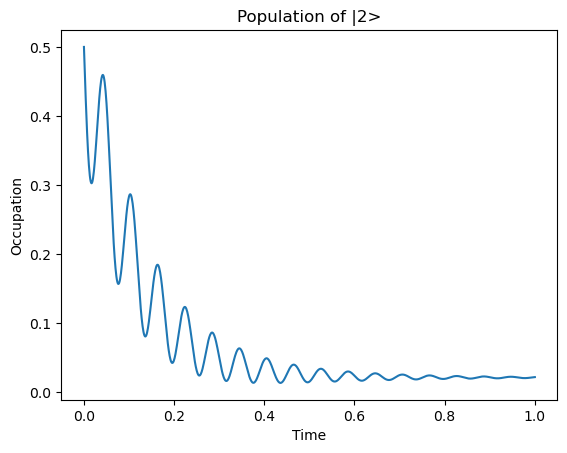

In [43]:
P22 = 0.5*(np.ones(len(w_points))+w_points)
plt.plot(t_points, P22)
plt.title('Population of |2>')
plt.xlabel('Time')
plt.ylabel('Occupation')
plt.show()

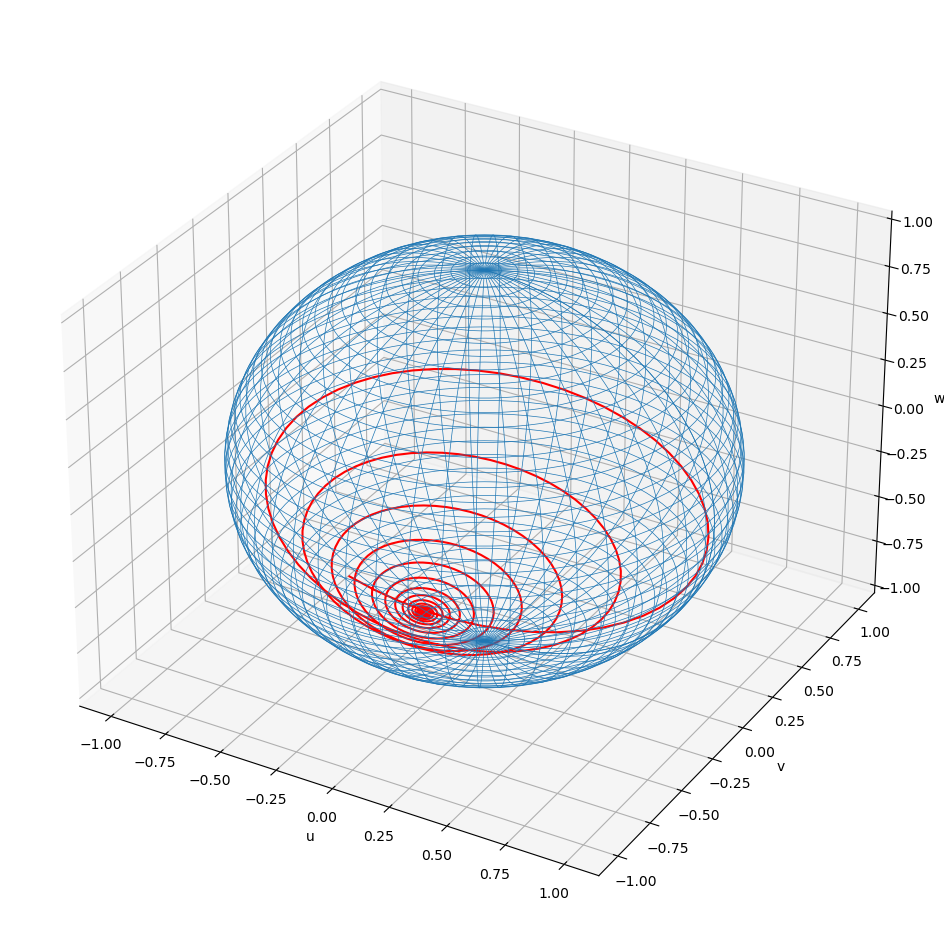

In [44]:
plot_points(u_points, v_points, w_points)